In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

train = pd.read_csv("/content/drive/MyDrive/패턴인식/train.csv")

----- 기본 import 밑 데이터 불러오기

In [ ]:
train.shape

print(train.isna().sum())

id                                 0
n_tokens_title                  2200
n_tokens_content                2146
n_unique_tokens                 2258
n_non_stop_words                2183
n_non_stop_unique_tokens        2256
num_hrefs                       2233
num_self_hrefs                  2280
num_imgs                        2214
num_videos                      2294
average_token_length            2213
num_keywords                    2245
kw_min_min                      2216
kw_max_min                      2179
kw_avg_min                      2229
kw_min_max                      2215
kw_max_max                      2232
kw_avg_max                      2160
kw_min_avg                      2151
kw_max_avg                      2182
kw_avg_avg                      2177
self_reference_min_shares       2206
self_reference_max_shares       2174
self_reference_avg_sharess      2246
LDA_00                          2224
LDA_01                          2202
LDA_02                          2153
L

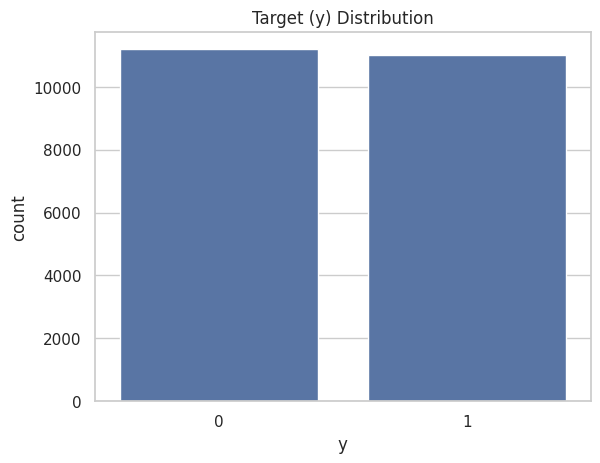

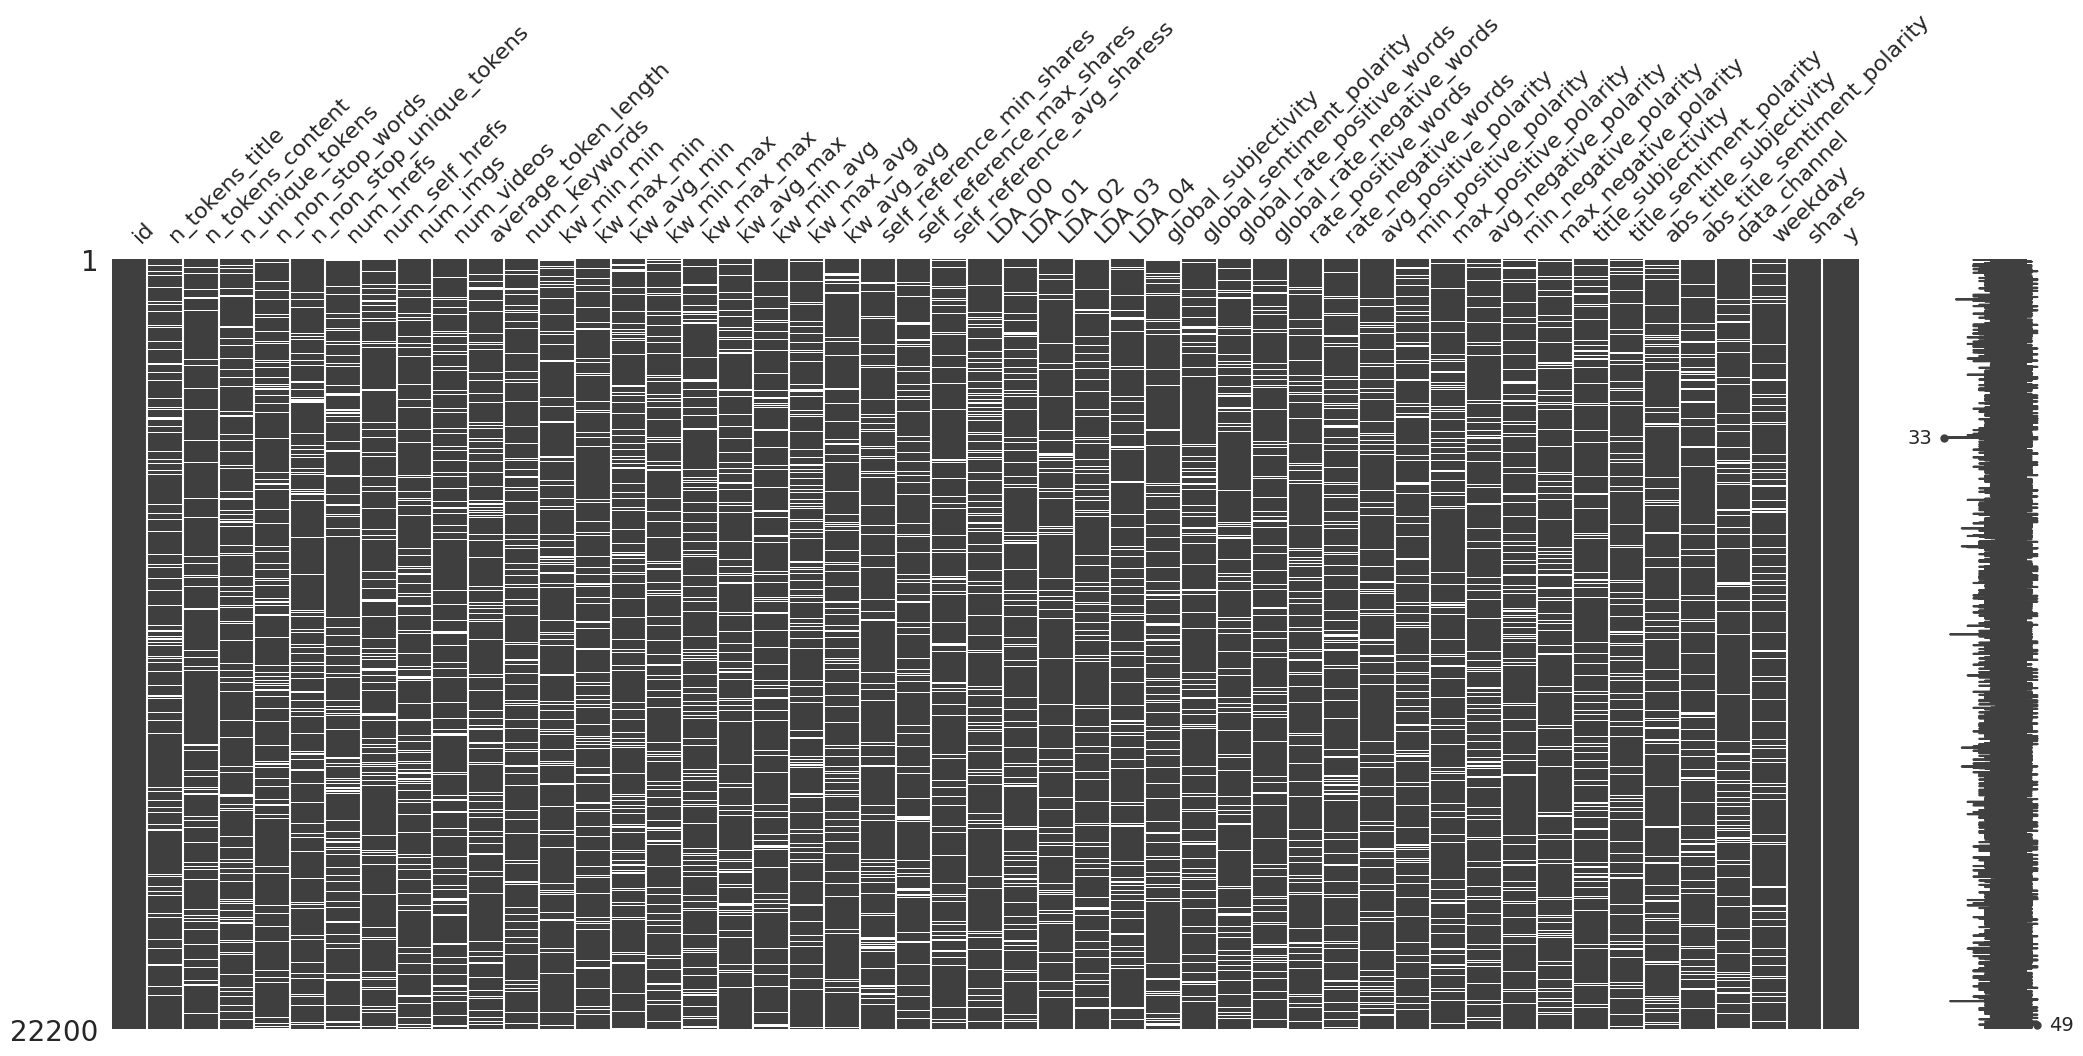

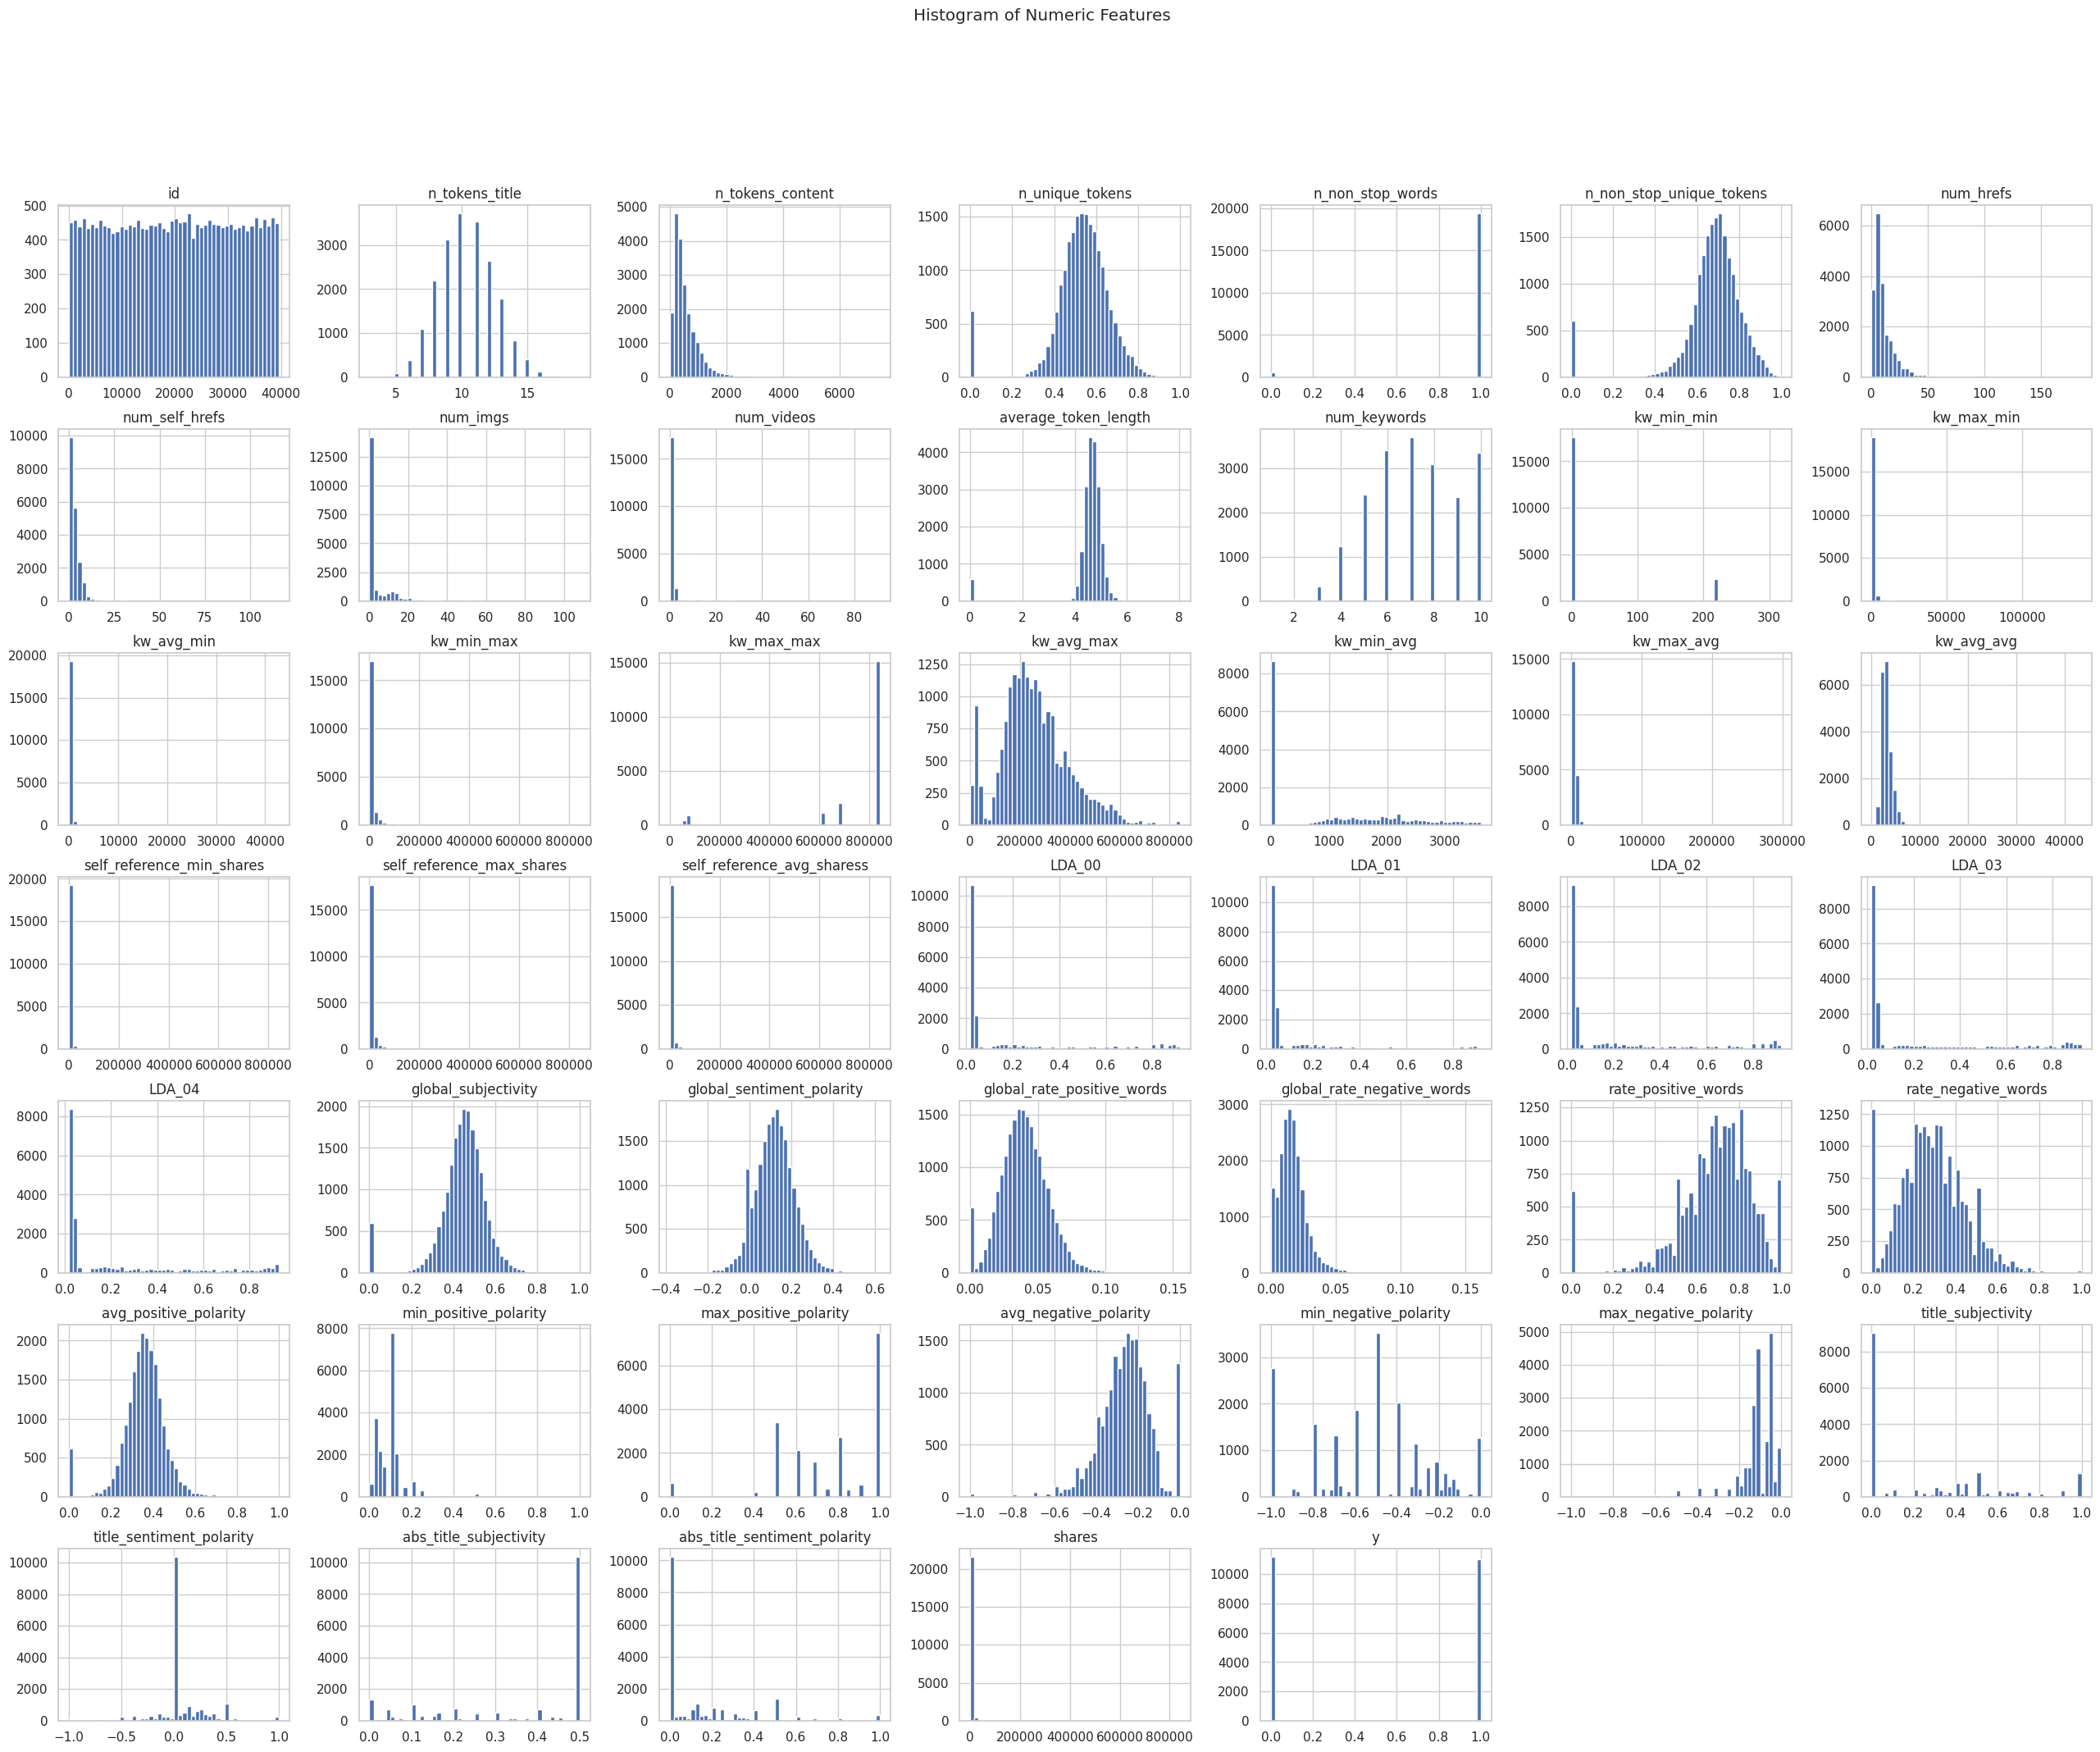

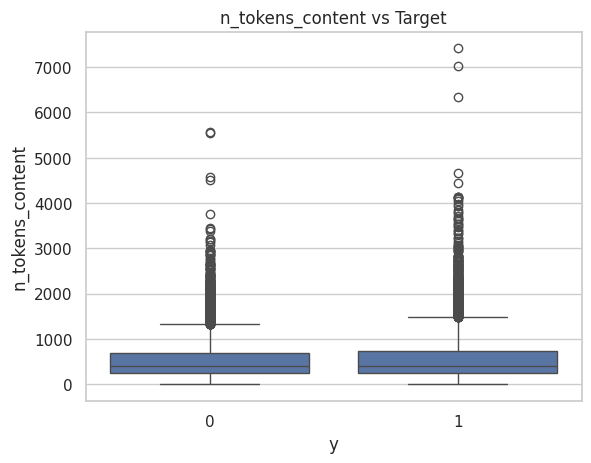

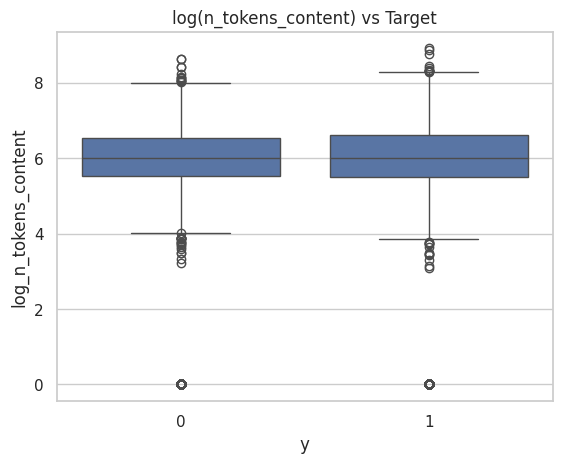

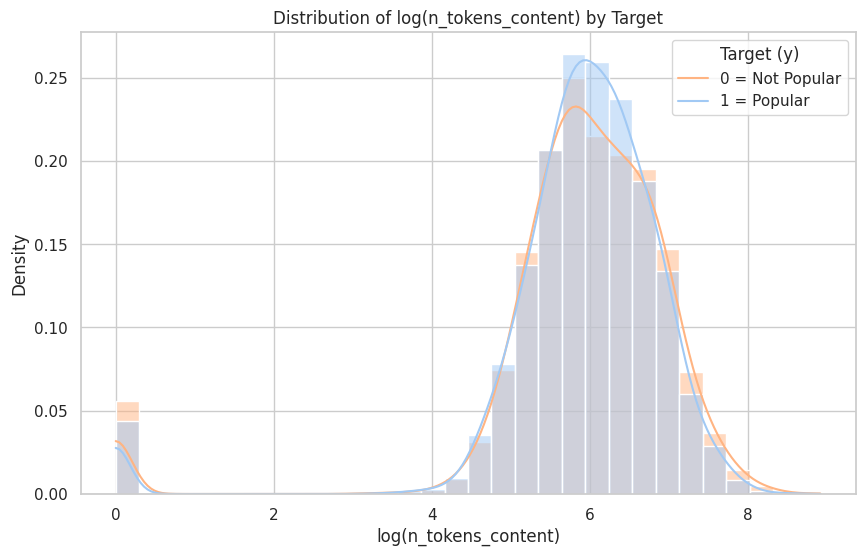

<ipython-input-11-017d77b0f940>:60: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from font(s) DejaVu Sans.
  pdf.savefig()
<ipython-input-11-017d77b0f940>:60: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  pdf.savefig()
<ipython-input-11-017d77b0f940>:60: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  pdf.savefig()
<ipython-input-11-017d77b0f940>:60: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
  pdf.savefig()
<ipython-input-11-017d77b0f940>:60: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  pdf.savefig()
<ipython-input-11-017d77b0f940>:60: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  pdf.savefig()
<ipython-input-11-017d77b0f940>:60: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  pdf.savefig()
<ipython-input-11-017d77b0f940>:60: Us

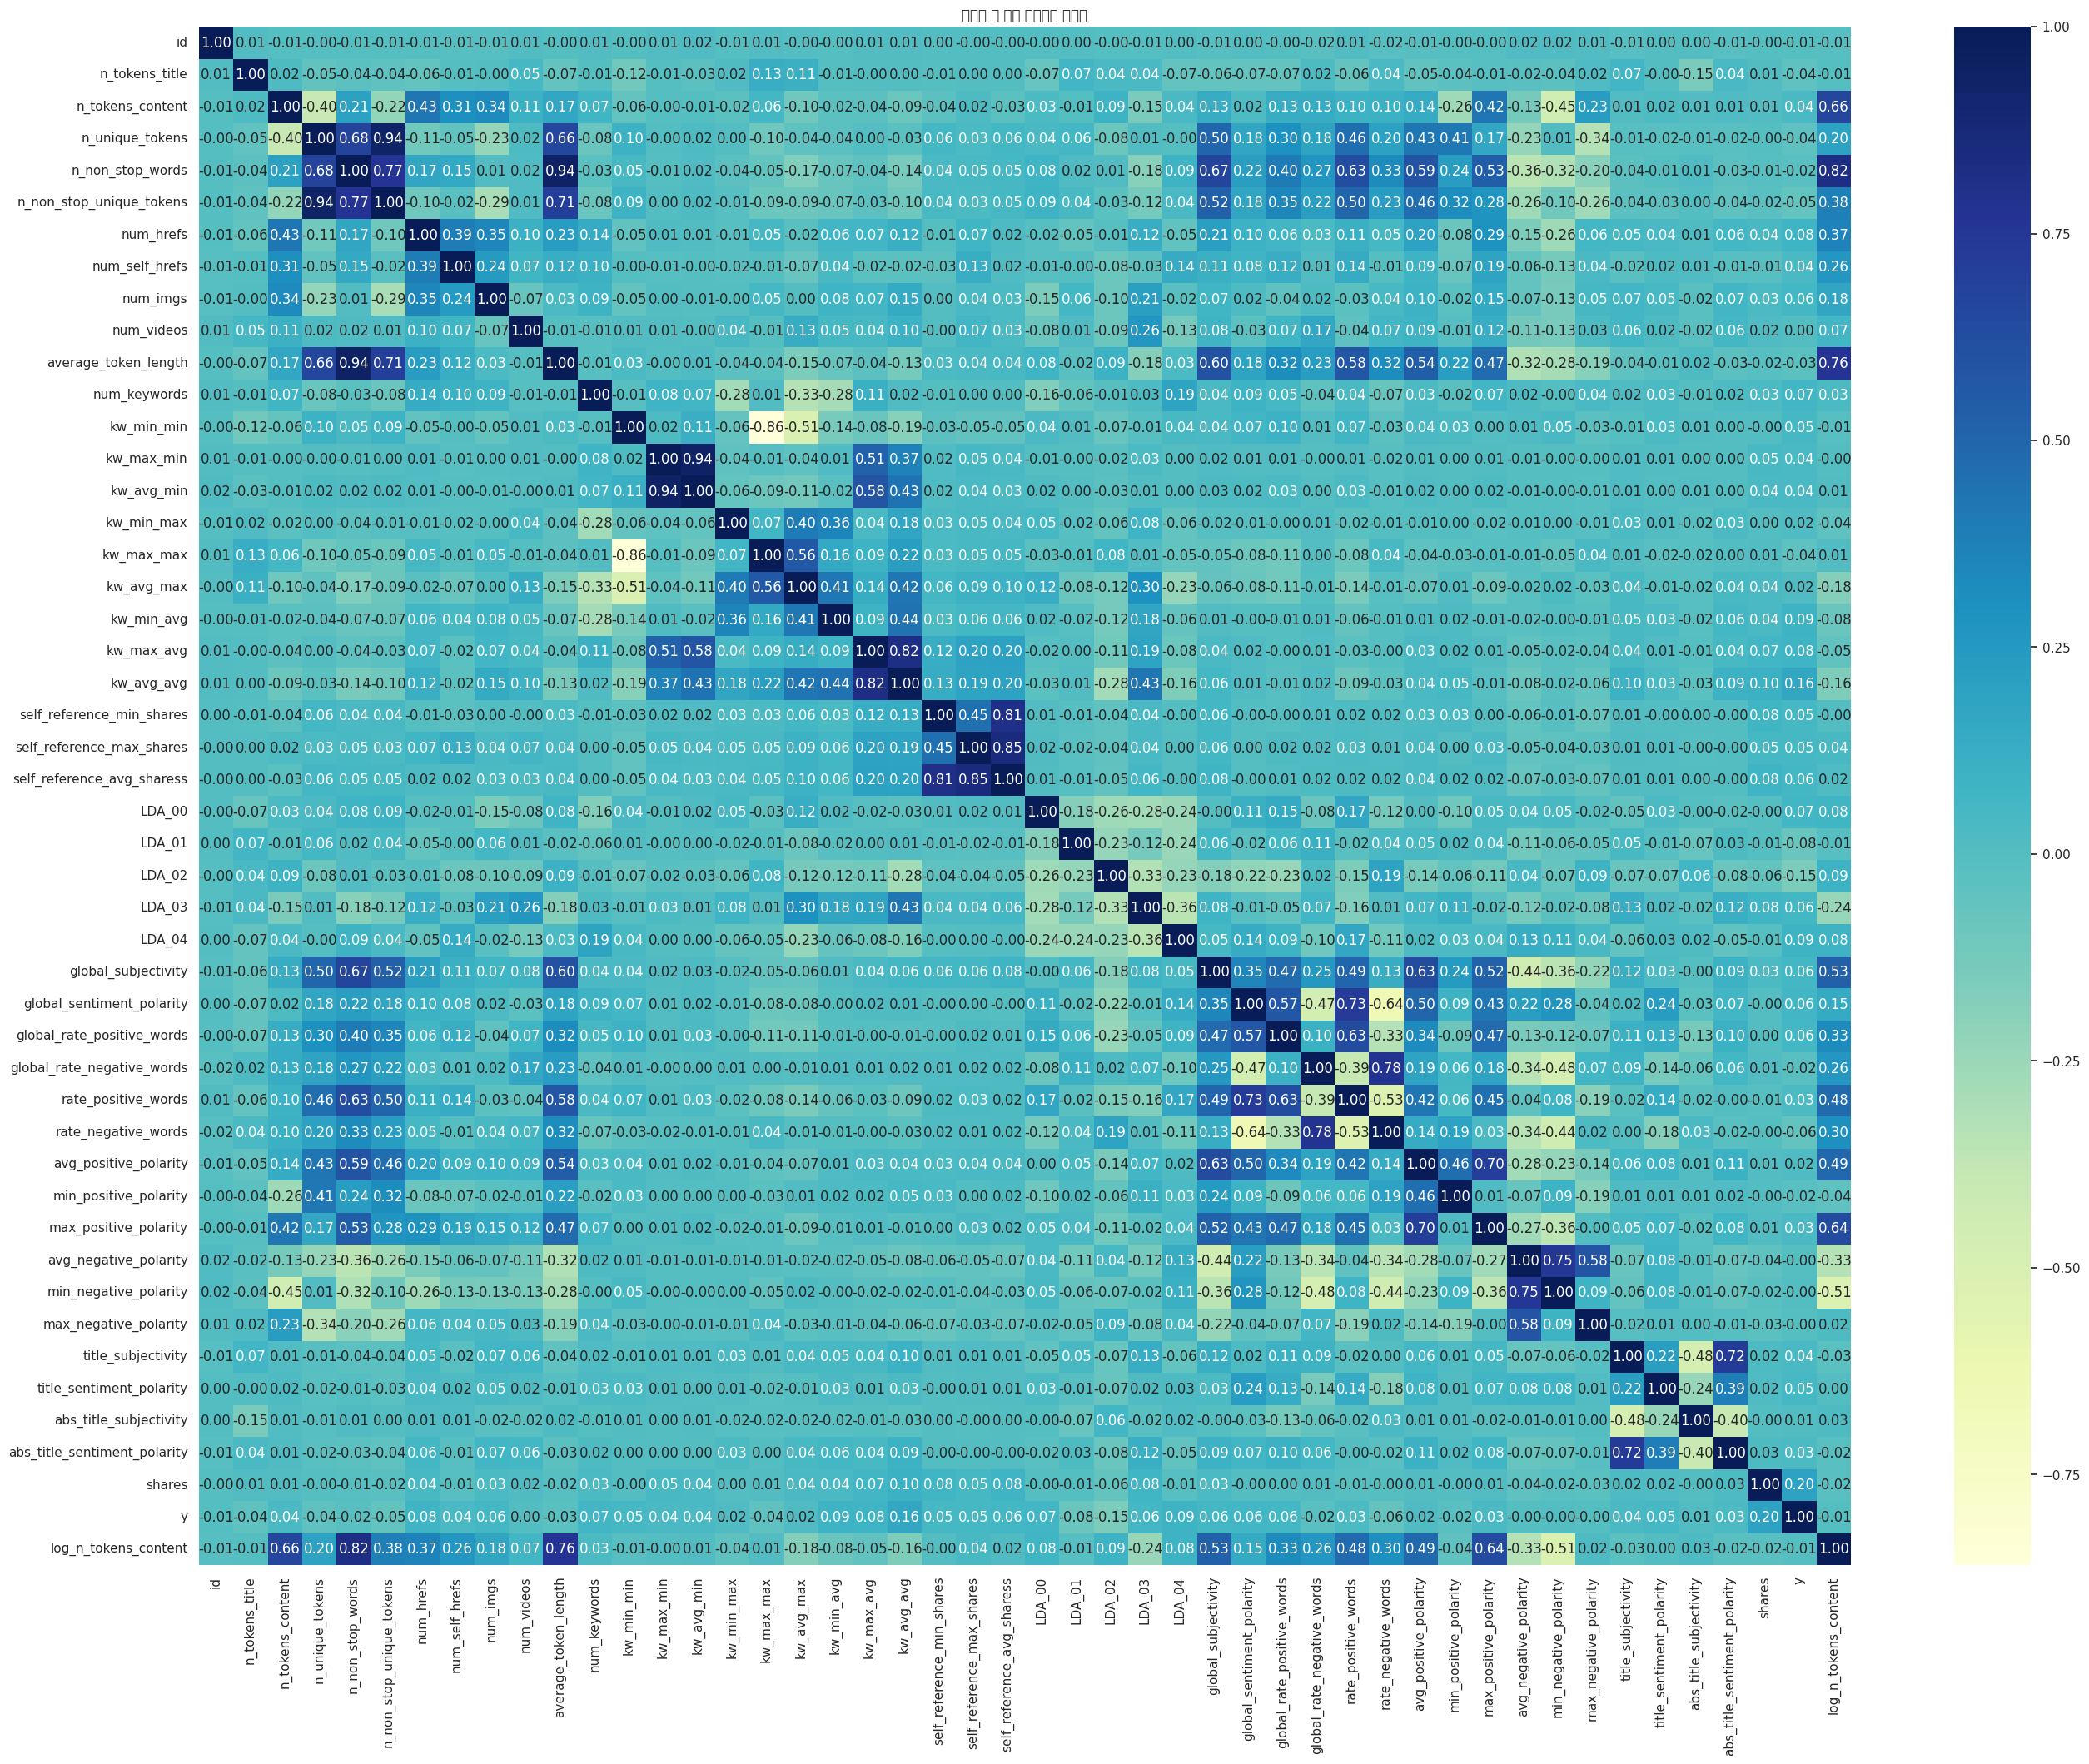

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with PdfPages("datavisualization.pdf") as pdf:

  sns.countplot(x='y', data=train)
  plt.title('Target (y) Distribution')
  pdf.savefig()
  plt.show()

  # 2. 결측치 시각화
  msno.matrix(train)
  pdf.savefig()
  plt.show()


  # 3. 수치형 변수 분포 예시
  numeric_cols = train.select_dtypes(include='number').columns.tolist()
  train[numeric_cols].hist(figsize=(32, 24), bins=50)
  plt.suptitle("Histogram of Numeric Features")
  pdf.savefig()
  plt.show()

  # 4. 타겟별 주요 변수 분포
  sns.boxplot(x='y', y='n_tokens_content', data=train)
  plt.title("n_tokens_content vs Target")
  pdf.savefig()
  plt.show()


  # 로그 변환 (log1p는 log(x + 1)이라 0도 처리 가능)
  train['log_n_tokens_content'] = np.log1p(train['n_tokens_content'])

  # Boxplot 시각화
  sns.boxplot(x='y', y='log_n_tokens_content', data=train)
  plt.title("log(n_tokens_content) vs Target")
  pdf.savefig()
  plt.show()

  # 시각화를 위한 스타일 설정
  sns.set(style='whitegrid')

# 히스토그램 + KDE, 타겟별 분포 비교
  plt.figure(figsize=(10, 6))
  sns.histplot(data=train, x='log_n_tokens_content', hue='y', kde=True, stat='density', bins=30, palette='pastel')
  plt.title("Distribution of log(n_tokens_content) by Target")
  plt.xlabel("log(n_tokens_content)")
  plt.ylabel("Density")
  plt.legend(title='Target (y)', labels=['0 = Not Popular', '1 = Popular'])
  pdf.savefig()
  plt.show()


  numeric_train = train.select_dtypes(include='number')

  # 상관관계 행렬 구하기
  corr = numeric_train.corr()

  # 히트맵 시각화
  plt.figure(figsize=(32, 24))
  sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
  plt.title('숫자형 열 간의 상관관계 히트맵')
  pdf.savefig()
  plt.show()

from google.colab import files
files.download("datavisualization.pdf")
